In [138]:
import phoebe 
from phoebe import u, c
import numpy as np
import matplotlib.pyplot as plt

# Import data 

In [139]:
lc = np.loadtxt('/mnt/c/Users/Karan/Documents/GitHub/Eclipsing-Binary-Modeling/data/detrended_lc.dat')
rvs = np.loadtxt('/mnt/c/Users/Karan/Documents/GitHub/Eclipsing-Binary-Modeling/data/rvs.dat')

In [140]:
b = phoebe.default_binary()

In [141]:
lc_times = lc[:, 0] - 2400000
b.add_dataset('lc', times = lc_times,
               fluxes = lc[:, 3], 
               sigmas = lc[:, 4],  
               compute_phases = phoebe.linspace(0, 1, 101),
               passband = 'Kepler:mean')

rv_times = rvs[:, 0] - 2400000
b.add_dataset('rv')
b.set_value_all('times@rv', value = rv_times) 
b['rvs@rv@primary'], b['sigmas@rv@primary'] = rvs[:, 1], rvs[:, 2]
b['rvs@rv@secondary'], b['sigmas@rv@secondary'] = rvs[:, 3], rvs[:, 4]

In [142]:
period = 10.3
b.set_value('period@binary', value = period)

ztime = 54967.39 # zero point within both c and rv ranges
b.set_value('t0_supconj', value = ztime)

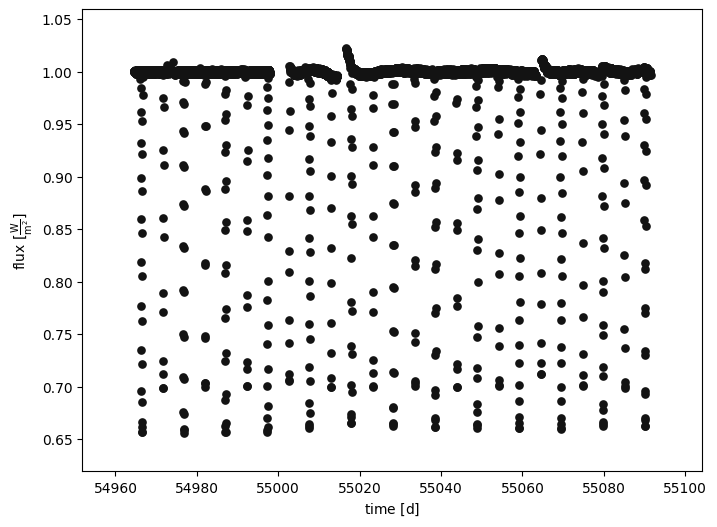

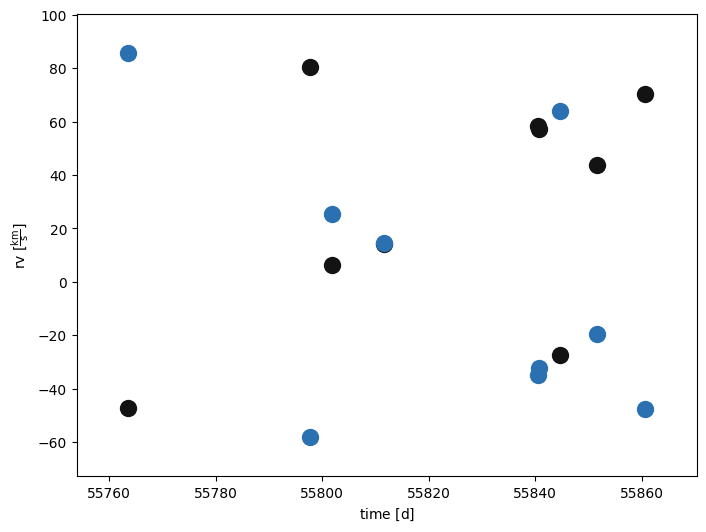

In [143]:
_ = b.plot(dataset = 'lc01', show = True, marker = '.')
_ = b.plot(dataset = 'rv01', show = True, marker = 'o')

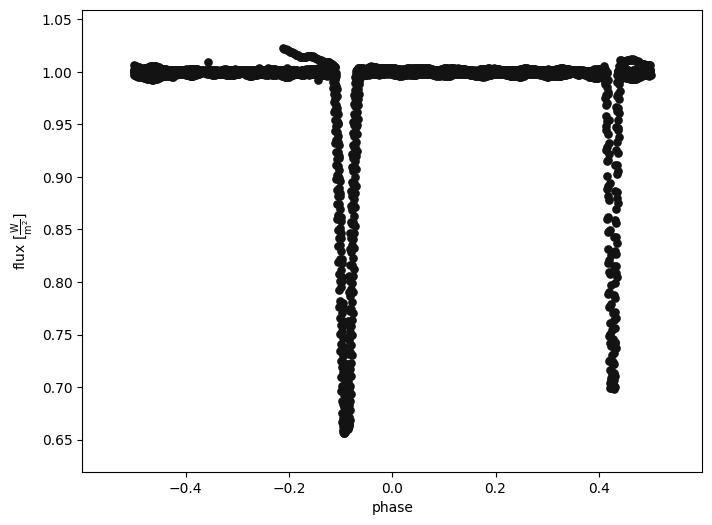

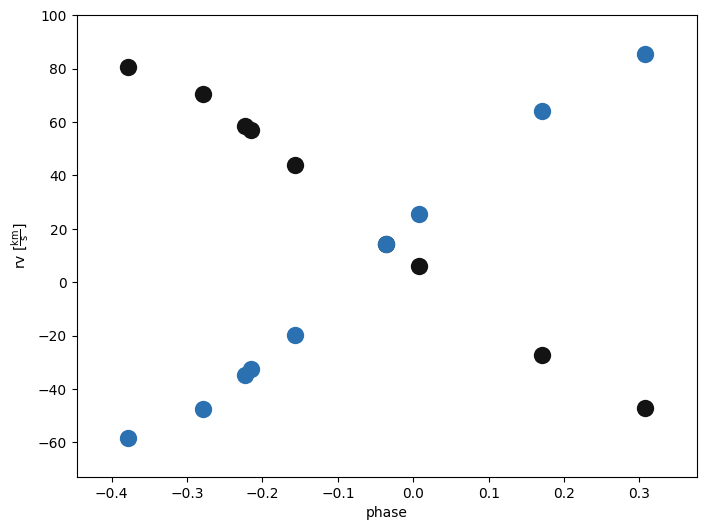

In [144]:
_ = b.plot(dataset = 'lc01', x = 'phases', show = True, marker = '.')
_ = b.plot(dataset = 'rv01', x = 'phases', show = True, marker = 'o')

In [145]:
b.add_solver('estimator.lc_geometry', solver = 'lc_geom')

<ParameterSet: 11 parameters | qualifiers: use_server, comments, lc_combine, interactive, phase_nbins, phase_bin, analytical_model, lc_datasets, expose_model, t0_near_times, orbit>

In [146]:
b.run_solver('lc_geom', solution = 'lcgeom_sol')

<ParameterSet: 21 parameters | qualifiers: fitted_values, input_sigmas, secondary_phase, secondary_depth, primary_phase, comments, primary_depth, secondary_width, eclipse_edges, analytic_fluxes, analytic_best_model, input_phases, analytic_phases, input_fluxes, orbit, adopt_parameters, adopt_distributions, fitted_units, primary_width, fitted_twigs, adopt_values>

In [147]:
print(b.adopt_solution('lcgeom_sol', trial_run = True))

ParameterSet: 5 parameters
   t0_supconj@binary@orbit@com...: 54966.470576538275 d
       ecc@binary@orbit@component: 0.2578376274589524
      per0@binary@orbit@component: 84.7138381928611 deg
   requivsumfrac@binary@orbit@...: 0.11151536649709887
   teffratio@binary@orbit@comp...: 0.976985831851128
